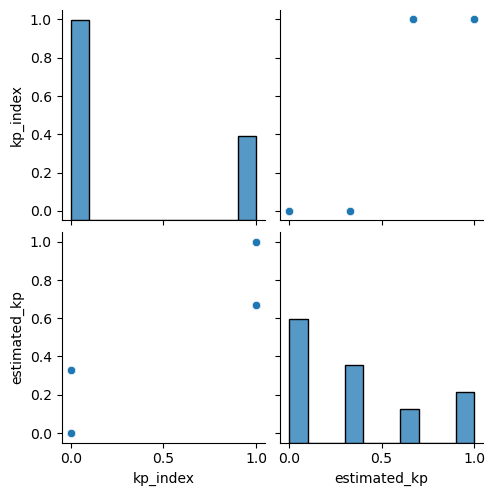

In [2]:
import seaborn as sns
import pandas as pd

# Load the dataset
data = pd.read_csv("planetary_k_index_1m.csv")
#data2 = pd.read_csv("dscovr_mag_1s.csv")


# Create a pair plot
sns.pairplot(data)


In [3]:
data.head()

,time_tag,kp_index,estimated_kp
0,2023-11-03T13:14:00,1,0.67
1,2023-11-03T13:15:00,1,0.67
2,2023-11-03T13:16:00,1,0.67
3,2023-11-03T13:17:00,1,0.67
4,2023-11-03T13:18:00,1,1.00


In [12]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the data
df = pd.read_csv('planetary_k_index_1m.csv')

# Handle missing values (if any)
# You can choose to fill it with mean, median, mode or use any other method
df.fillna(df.mean(), inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['kp_index'] = scaler.fit_transform(df['kp_index'].values.reshape(-1,1))

# Convert time series data into supervised learning problem
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# Number of lag hours
n_hours = 50
n_features = 1

# Frame as supervised learning
reframed = series_to_supervised(df, n_hours, 1)

print(reframed.head())


             var1(t-50)  var2(t-50)  var3(t-50)           var1(t-49)  \
50  2023-11-03T13:14:00         1.0        0.67  2023-11-03T13:15:00   
51  2023-11-03T13:15:00         1.0        0.67  2023-11-03T13:16:00   
52  2023-11-03T13:16:00         1.0        0.67  2023-11-03T13:17:00   
53  2023-11-03T13:17:00         1.0        0.67  2023-11-03T13:18:00   
54  2023-11-03T13:18:00         1.0        1.00  2023-11-03T13:19:00   

    var2(t-49)  var3(t-49)           var1(t-48)  var2(t-48)  var3(t-48)  \
50         1.0        0.67  2023-11-03T13:16:00         1.0        0.67   
51         1.0        0.67  2023-11-03T13:17:00         1.0        0.67   
52         1.0        0.67  2023-11-03T13:18:00         1.0        1.00   
53         1.0        1.00  2023-11-03T13:19:00         1.0        1.00   
54         1.0        1.00  2023-11-03T13:20:00         1.0        1.00   

             var1(t-47)  ...  var3(t-3)            var1(t-2) var2(t-2)  \
50  2023-11-03T13:17:00  ...        1.0  2

C:\Users\shwet\AppData\Local\Temp\ipykernel_5392\4250462596.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [8]:
from sklearn.model_selection import train_test_split

# Assuming that 'reframed' is your preprocessed DataFrame from step 1

# Define your target variable (what you want to predict)
# In this case, we want to predict the Kp index at time t
y = reframed['var1(t)']

# Define your features (what you will use to make the prediction)
# In this case, we use all other columns as features
X = reframed.drop('var1(t)', axis=1)

# Split the data into a training set and a test set
# We use 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)


NameError: name 'reframed' is not defined

In [6]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Assuming that 'X_train' and 'y_train' are your preprocessed training data from step 3

# Reshape input to be 3D [samples, timesteps, features]
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(loss='mae', optimizer='adam')

# Fit the model
history = model.fit(X_train, y_train, epochs=50, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False)

# Plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


NameError: name 'X_train' is not defined